# How to Calculate Progressive Passes in Python

Made from [this video](https://www.youtube.com/watch?v=kuD1yMwjCwE) by McKay Johns.

## Prepare

### Importing

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from statsbombpy import sb

from mplsoccer import Pitch, VerticalPitch

In [96]:
rcParams['text.color'] = '#c7d5cc'  # set the default text color

## Getting data from Statsbomb API

In [4]:
MATCH_ID = 22912 # Liverpool vs Tottenham ECL Finals 2019
events = sb.events(match_id = MATCH_ID)
# passes = sb.events(match_id = MATCH_ID, split=True, flatten_attrs=False)['passes']

credentials were not supplied. open data access only
credentials were not supplied. open data access only


In [15]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected

In [84]:
player = 'Virgil van Dijk'

mask_team = (events['type'] == 'Pass') & (events['team'] == 'Liverpool') & (events['player'] == player)
passes = events.loc[mask_team, ['team', 'player', 'minute', 'second', 'pass_type', 'pass_outcome', 'location', 'pass_end_location']].reset_index()
passes['pass_outcome'] = passes['pass_outcome'].fillna('Successful')

# Split location column to x, y columns
passes[['x','y']] = passes['location'].to_list()
# Split pass_end_location column to endX and endY columns
passes[['endX','endY']] = passes['pass_end_location'].to_list()

passes.drop(['index','location', 'pass_end_location'], axis=1, inplace=True)

passes.reset_index()

,index,team,player,minute,second,pass_type,pass_outcome,x,y,endX,endY
0,0,Liverpool,Virgil van Dijk,0,14,Recovery,Successful,60.4,20.5,66.3,20.1
1,1,Liverpool,Virgil van Dijk,9,25,NaN,Successful,8.7,15.1,3.6,33.6
2,2,Liverpool,Virgil van Dijk,9,39,NaN,Successful,25.1,31.0,112.1,26.8
3,3,Liverpool,Virgil van Dijk,13,4,Recovery,Incomplete,58.1,54.6,71.9,70.3
4,4,Liverpool,Virgil van Dijk,14,27,Recovery,Successful,30.3,30.0,27.0,4.1
5,5,Liverpool,Virgil van Dijk,15,46,NaN,Successful,15.2,14.0,10.4,36.9
6,6,Liverpool,Virgil van Dijk,15,57,NaN,Successful,15.4,23.9,41.5,6.5
7,7,Liverpool,Virgil van Dijk,16,3,NaN,Successful,24.4,29.4,24.4,55.6
8,8,Liverpool,Virgil van Dijk,16,10,NaN,Successful,29.3,39.5,29.3,55.6
9,9,Liverpool,Virgil van Dijk,18,12,NaN,Successful,22.8,31.5,37.5,6.5


In [88]:
passes.head()

,team,player,minute,second,pass_type,pass_outcome,x,y,endX,endY,beginning,end,progressive
0,Liverpool,Virgil van Dijk,0,14,Recovery,Successful,60.4,20.5,66.3,20.1,71.635606,66.810104,False
1,Liverpool,Virgil van Dijk,9,25,NaN,Successful,8.7,15.1,3.6,33.6,118.205711,122.944540,False
2,Liverpool,Virgil van Dijk,9,39,NaN,Successful,25.1,31.0,112.1,26.8,102.834868,40.442675,True
3,Liverpool,Virgil van Dijk,13,4,Recovery,Incomplete,58.1,54.6,71.9,70.3,73.328098,61.994435,False
4,Liverpool,Virgil van Dijk,14,27,Recovery,Successful,30.3,30.0,27.0,4.1,98.061664,101.217093,False


## Plotting

#### **Distance formula**  
$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

In [86]:
# Calculate distance from the goal for pass start and end locations
# Point of the goal has coordinates [120, 40]
passes['beginning'] = np.sqrt(np.square(120-passes['x']) + np.square(40)-passes['y'])
passes['end'] = np.sqrt(np.square(120-passes['endX']) + np.square(40)-passes['endY'])

In [87]:
passes['progressive'] = [(passes['end'][x]) / (passes['beginning'][x]) < .75 for x in range(len(passes.beginning))]

In [89]:
passes_prog = passes.loc[passes['progressive']==True]
passes_prog.head(10)

,team,player,minute,second,pass_type,pass_outcome,x,y,endX,endY,beginning,end,progressive
2,Liverpool,Virgil van Dijk,9,39,NaN,Successful,25.1,31.0,112.1,26.8,102.834868,40.442675,True
14,Liverpool,Virgil van Dijk,30,26,Interception,Out,32.4,26.6,87.7,1.6,96.162155,51.397373,True
15,Liverpool,Virgil van Dijk,40,17,Recovery,Successful,45.9,46.4,76.6,59.6,83.930984,58.514614,True
29,Liverpool,Virgil van Dijk,63,33,Recovery,Successful,28.7,56.4,98.9,76.0,99.394618,44.375782,True
30,Liverpool,Virgil van Dijk,69,38,Recovery,Incomplete,28.6,30.6,56.9,35.9,99.616063,74.469524,True
31,Liverpool,Virgil van Dijk,79,5,Recovery,Successful,26.9,36.2,56.9,25.3,101.150433,74.540660,True


Text(0.5, 1.0, 'Virgil van Dijk Progressive Passes vs Tottenham. ECL Finals 2019')

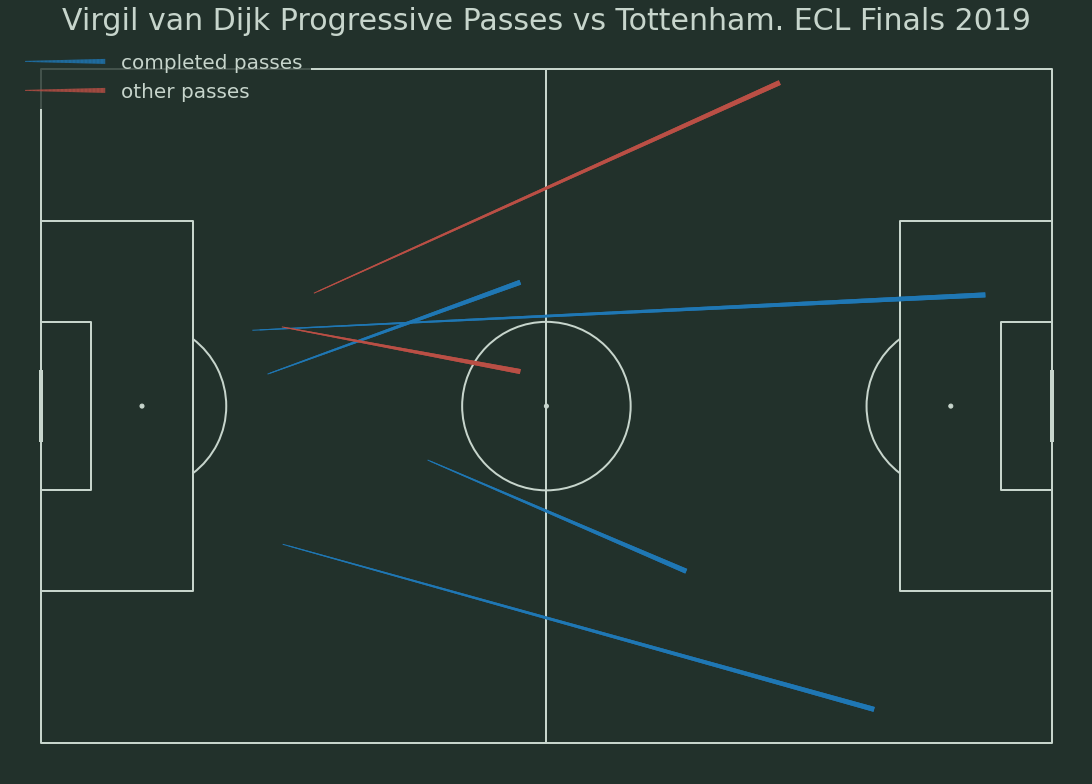

In [98]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

mask_complete = passes_prog.pass_outcome == 'Successful'

# Draw successful passes
pitch.lines(
    passes_prog[mask_complete].x, passes_prog[mask_complete].y, 
    passes_prog[mask_complete].endX, passes_prog[mask_complete].endY, 
    label='completed passes', comet=True, ax=ax
)

# Draw unsuccessful passes
pitch.lines(
    passes_prog[~mask_complete].x, passes_prog[~mask_complete].y, 
    passes_prog[~mask_complete].endX, passes_prog[~mask_complete].endY, 
    label='other passes', color='#ba4f45', comet=True, ax=ax
)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
ax.set_title(f"{player} Progressive Passes vs Tottenham. ECL Finals 2019", fontsize=30)

In [99]:
fig.savefig('virgil-progressive-passes-vs-tottenham-ecl-2019-finals.png')